<h1> Exploration dataset: further analysis</h1>

Python version: 3.10 </br>
Author: Grégoire Corlùy

Do some preprocessing of the features, do a correlation analysis of the features and perform a PCA analysis

Import data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

In [6]:
dataset = pd.read_csv('../datasets/train.csv')
print(f"Size of the dataset is {dataset.shape}")

Size of the dataset is (5044, 39)


In [7]:
print(dataset["Gender"].head())

0    F
1    M
2    F
3    F
4    F
Name: Gender, dtype: object


In [9]:
#convert gender labels to 0-1 encoding

dataset["Gender"] = dataset["Gender"].replace({'M': 0, 'F': 1}).infer_objects(copy=False) #add last command to remove the warning of depreciation

In [10]:
#check correctly implemented
print(dataset["Gender"].head())

0    1
1    0
2    1
3    1
4    1
Name: Gender, dtype: int64


In [14]:
#convert Connect_Date to "integer"
#transform all dates to a number
def convert_to_timestamp(date_str):
    return time.mktime(datetime.datetime.strptime(date_str, "%d/%m/%y").timetuple())/3600/24 #expressed in second I think, so I convert it to days

dataset['Connect_Date_tmstp'] = dataset['Connect_Date'].apply(convert_to_timestamp)
print(dataset["Connect_Date_tmstp"].head)
#expressed in days

#shift by removing the minimal value to every observation, try to have smaller numbers
dataset['Connect_Date_tmstp_shift'] = dataset['Connect_Date_tmstp'] - np.min(dataset['Connect_Date_tmstp'])
print(dataset["Connect_Date_tmstp_shift"].head)
#expressed in days relative to the first date in the dataset

<bound method NDFrame.head of 0       10365.916667
1        9845.958333
2       10099.916667
3       10419.916667
4       10598.958333
            ...     
5039    10118.916667
5040     9766.916667
5041    10749.916667
5042    10285.958333
5043    10541.958333
Name: Connect_Date_tmstp, Length: 5044, dtype: float64>
<bound method NDFrame.head of 0        869.958333
1        350.000000
2        603.958333
3        923.958333
4       1103.000000
           ...     
5039     622.958333
5040     270.958333
5041    1253.958333
5042     790.000000
5043    1046.000000
Name: Connect_Date_tmstp_shift, Length: 5044, dtype: float64>


In [16]:
print(dataset.columns)

Index(['Gender', 'Age', 'Connect_Date', 'L_O_S', 'Dropped_Calls', 'tariff',
       'Handset', 'Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum',
       'OffPeak_mins_Sum', 'Weekend_calls_Sum', 'Weekend_mins_Sum',
       'International_mins_Sum', 'Nat_call_cost_Sum', 'AvePeak', 'AveOffPeak',
       'AveWeekend', 'National_calls', 'National mins', 'AveNational',
       'All_calls_mins', 'Dropped_calls_ratio', 'Usage_Band', 'Mins_charge',
       'call_cost_per_min', 'actual call cost', 'Total_call_cost',
       'Total_Cost', 'Tariff_OK', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio',
       'high Dropped calls', 'No Usage', 'target', 'id', 'Connect_Date_tmstp',
       'Connect_Date_tmstp_shift'],
      dtype='object')


In [23]:
#keep "continuous" features
dataset_ctu = dataset.drop(columns=["id","Connect_Date","Connect_Date_tmstp","tariff","Handset","Usage_Band","Tariff_OK","high Dropped calls","No Usage"])
print(dataset_ctu.shape)

#39-7=32 (Correct)
#Connect date is still present with another name, so not really removed

(5044, 32)


Normalize the columns

In [24]:
dataset_ctu_norm = (dataset_ctu-dataset_ctu.mean())/dataset_ctu.std()

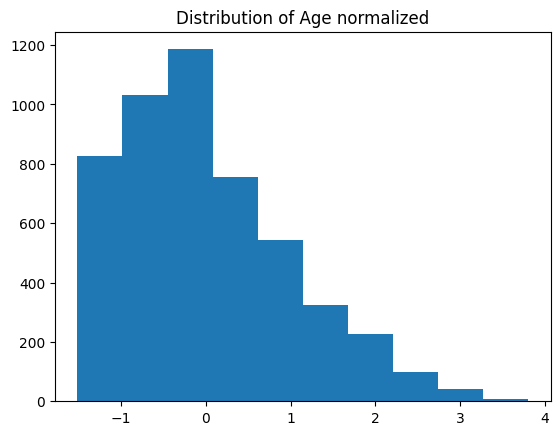

In [26]:
#check if normalization worked
plt.hist(dataset_ctu_norm["Age"])
plt.title("Distribution of Age normalized")
plt.show()